## Customer Purchasing Intention

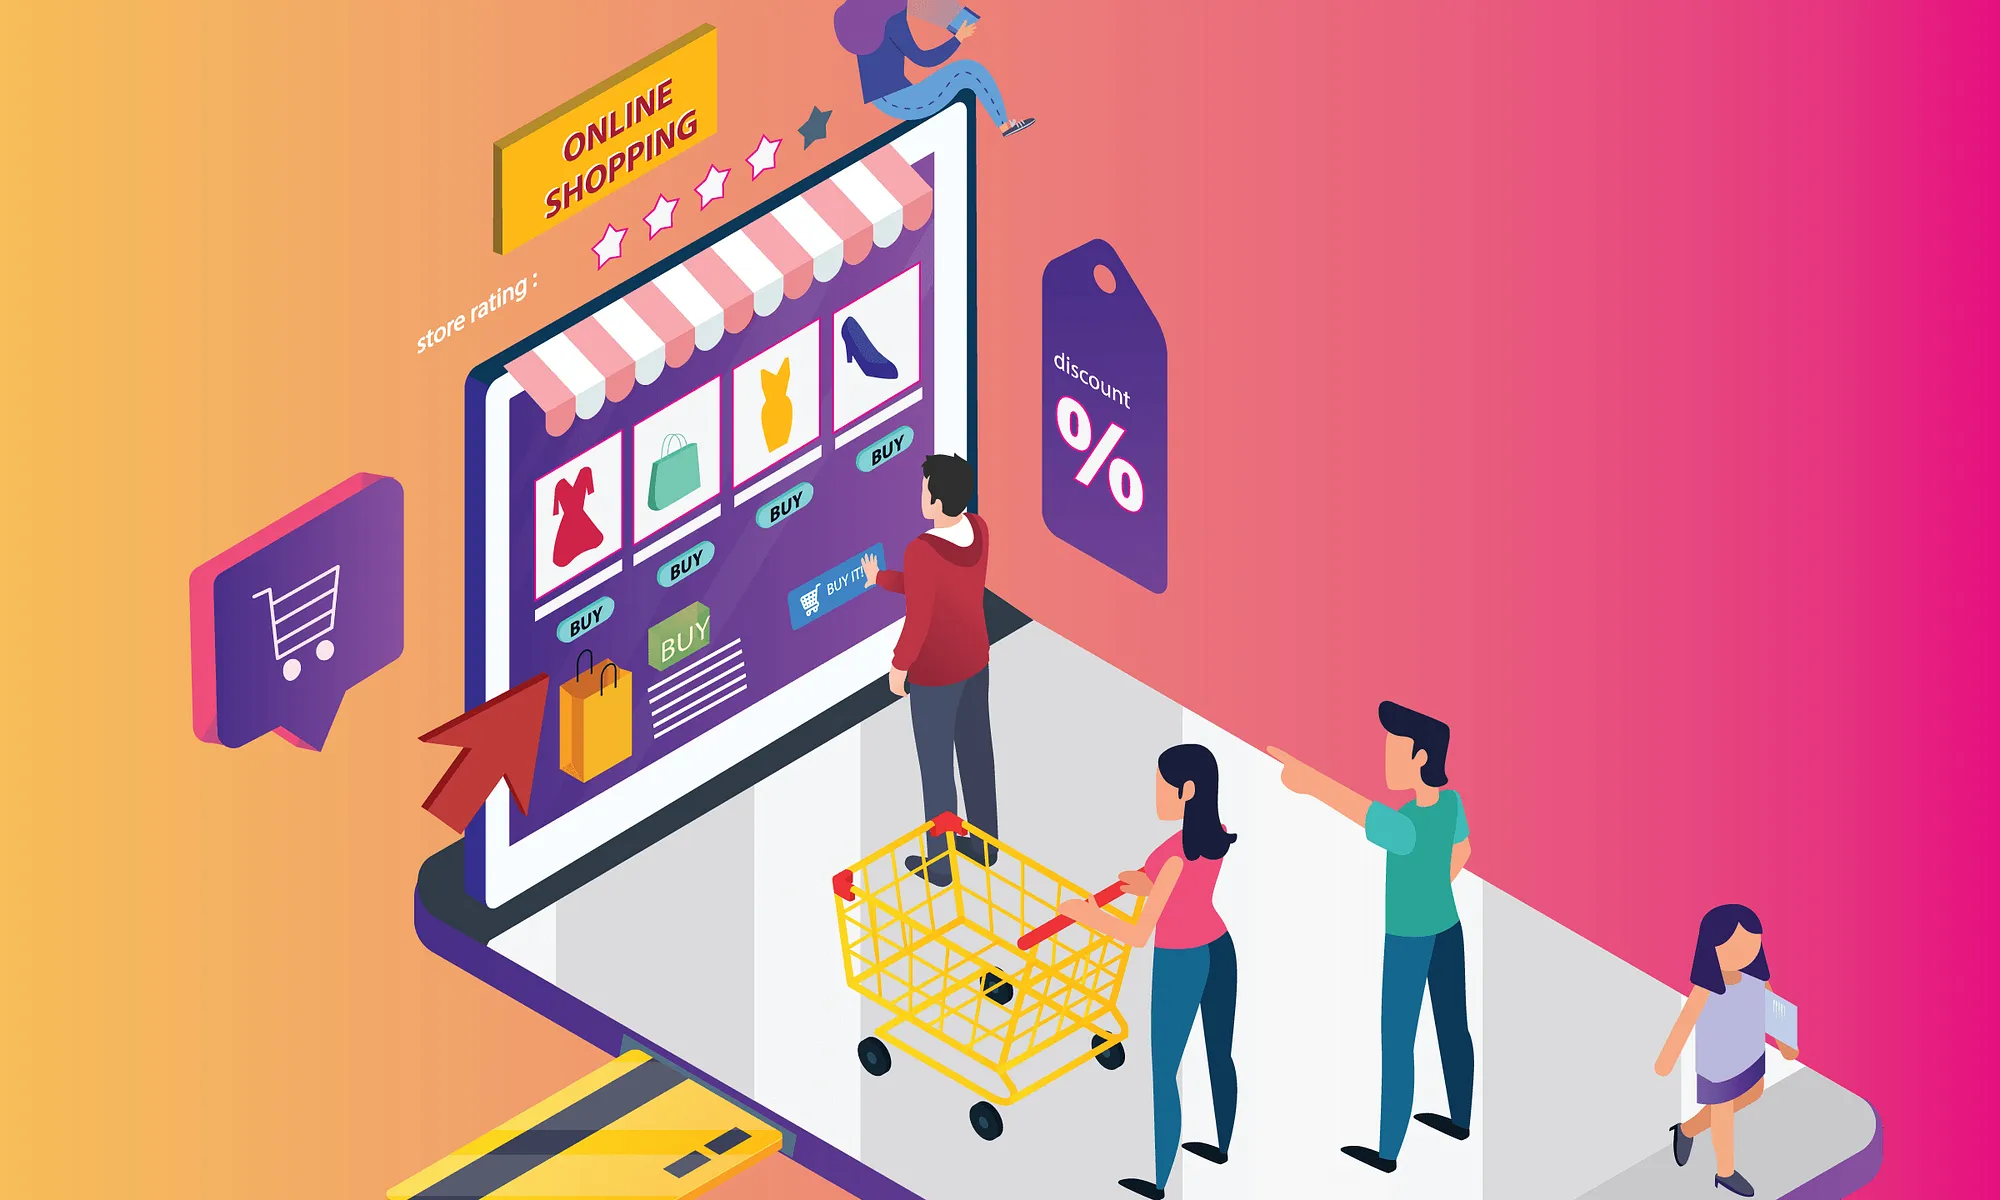

#### Project Description:
###### The goal of this project is to predict whether a customer will complete a purchase during their visit to an e-commerce website. By analyzing the customer's browsing behavior, such as the number of pages viewed, the time spent on the site, and the type of products they interact with, you can build a classification model that forecasts the likelihood of a purchase. This prediction can then be used by marketing teams to target high-intent customers with personalized offers or by the website itself to enhance user experience, increasing conversion rates.

#### Dataset Information

##### Dataset contains 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

#### Additional Information

##### The dataset consists of feature vectors belonging to 12,330 sessions. 
##### The dataset was formed so that each session
##### would belong to a different user in a 1-year period to avoid
##### any tendency to a specific campaign, special day, user
##### profile, or period. 

#### Data Dictionary :

##### 1.Administrative: Time spent on administrative pages. This might reflect the time users spend on pages related to account management or site settings.

##### 2.Administrative_Duration: Duration spent on administrative pages, usually in seconds. This provides a measure of how engaged users are with administrative content.

##### 3.Informational: Time spent on informational pages. These could include pages with content or articles intended to inform or engage users.

##### 4.Informational_Duration: Duration spent on informational pages, usually in seconds.

##### 5.ProductRelated: Time spent on product-related pages. These are the pages where users browse products or view product details.

##### 6.ProductRelated_Duration: Duration spent on product-related pages, usually in seconds.

##### 7.BounceRates: The percentage of visitors who enter the site and leave ("bounce") without interacting further. This can indicate the attractiveness or relevance of the landing page.

##### 8.ExitRates: The percentage of visitors who exit the site from a particular page. This is a measure of how often a page is the last page viewed.

##### 9.PageValues: The average value of a page viewed by visitors before making a purchase. It is a metric used to evaluate the monetary worth of a page in driving sales.

##### 10.SpecialDay: A numeric value indicating the importance of a special day. For example, this might be a value representing how close the visit is to a special holiday or event.

##### 11.Month: The month during which the visit occurred. This is often encoded as a categorical feature (e.g., Jan, Feb, Mar, etc.).

##### 12.OperatingSystems: The operating system used by the visitor. This can include categories like Windows, macOS, Linux, etc.

##### 13.Browser: The browser used by the visitor (e.g., Chrome, Firefox, Safari).

##### 14.Region: The geographic region from which the visitor is accessing the site (e.g., Europe, Asia, North America).

##### 15.TrafficType: The type of traffic that brought the visitor to the site (e.g., Direct, Referral, Search Engine).

##### 16.VisitorType: The type of visitor, which might include categories such as New Visitor or Returning Visitor.

##### 17.Weekend: A binary feature indicating whether the visit occurred on a weekend.

##### 18.Revenue: The target variable indicating whether the visitor made a purchase or not. This is often a binary value (0 or 1).

#### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score , roc_curve

#### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\online+shoppers+purchasing+intention+dataset\\online_shoppers_intention.csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Exploratory Data Analysis

#### Shape

In [4]:
df.shape

(12330, 18)

##### Insights : Dataset contains 12330 records and 18 column

#### Size

In [5]:
df.size

221940

##### Insights : Dataset contains 221940 size

#### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##### insights : Dataset contains most of the data is numerical and it contains only one feature is object and two variables contain boolian data as well as data does not contains any missing value

### Univariate Analysis

##### Purchasing Rate Of Customers

In [7]:
len(df[df['Revenue'] == True]) / len(df) * 100

15.474452554744525

##### Insights : Purchasing Rate of Customers are 15.474452554744525%

#### Non Purchasing Rate Of Customers

In [8]:
len(df[df['Revenue'] == False]) / len(df) * 100

84.52554744525548

#### Insights : Non Purchasing Rate of Customers are 84.52554744525548%

In [9]:
df['Revenue'].value_counts().index

Index([False, True], dtype='bool')

#### Purchasing Rate of Customers

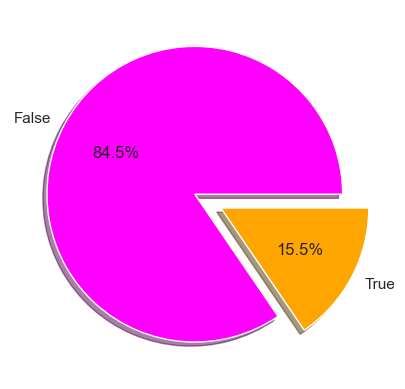

In [10]:
plt.pie(x = df['Revenue'].value_counts().values,
    explode=(0 , 0.2),
    labels=df['Revenue'].value_counts().index,
    colors=('magenta' , 'orange'),
    autopct='%1.1f%%',
    pctdistance=0.6,
    shadow=True,
    radius=1)
plt.show()

#### Insights : True means customer will Purchase and False means customer will not purhcase

### Data Preprocessing

##### 1. Handling missing values

In [11]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### 2. Encoding The Characters

#### Insights : Dataset contains Month , VisitorType , Weekend , Revenue are the non numerical variables . Month and VisitorType contains object data and Weekend and Revenue contains bool data.

In [12]:
df[['Month' , 'VisitorType' , 'Weekend' , 'Revenue']]

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False
...,...,...,...,...
12325,Dec,Returning_Visitor,True,False
12326,Nov,Returning_Visitor,True,False
12327,Nov,Returning_Visitor,True,False
12328,Nov,Returning_Visitor,False,False


#### Insights : In Month as well as VisitorType variable contains categorical data  means it contains nominal data

#### Onehot Encoding

#### Month

In [13]:
df = pd.get_dummies(data = df,
    prefix='Month',
    columns=['Month'],
    drop_first = True)

In [14]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,False,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,False,0,1,0,0,0,0,0,0,0


#### VisitorType

In [15]:
df = pd.get_dummies(data = df,
    prefix='VisitorType',
    columns=['VisitorType'],
    drop_first = True)

In [16]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


#### Encoding boolian data

#### Weekend

In [17]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [18]:
df['Weekend'] = df['Weekend'].astype(int)

In [19]:
df['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

#### Revenue

In [20]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [21]:
df['Revenue'] = df['Revenue'].astype(int)

In [22]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

#### Split the data into independent and dependent variable

In [23]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [24]:
x = df.drop(['Revenue'] , axis = 1)

In [25]:
y = df['Revenue']

In [26]:
x.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [27]:
y.head(2)

0    0
1    0
Name: Revenue, dtype: int32

### 3. Handling Outliers

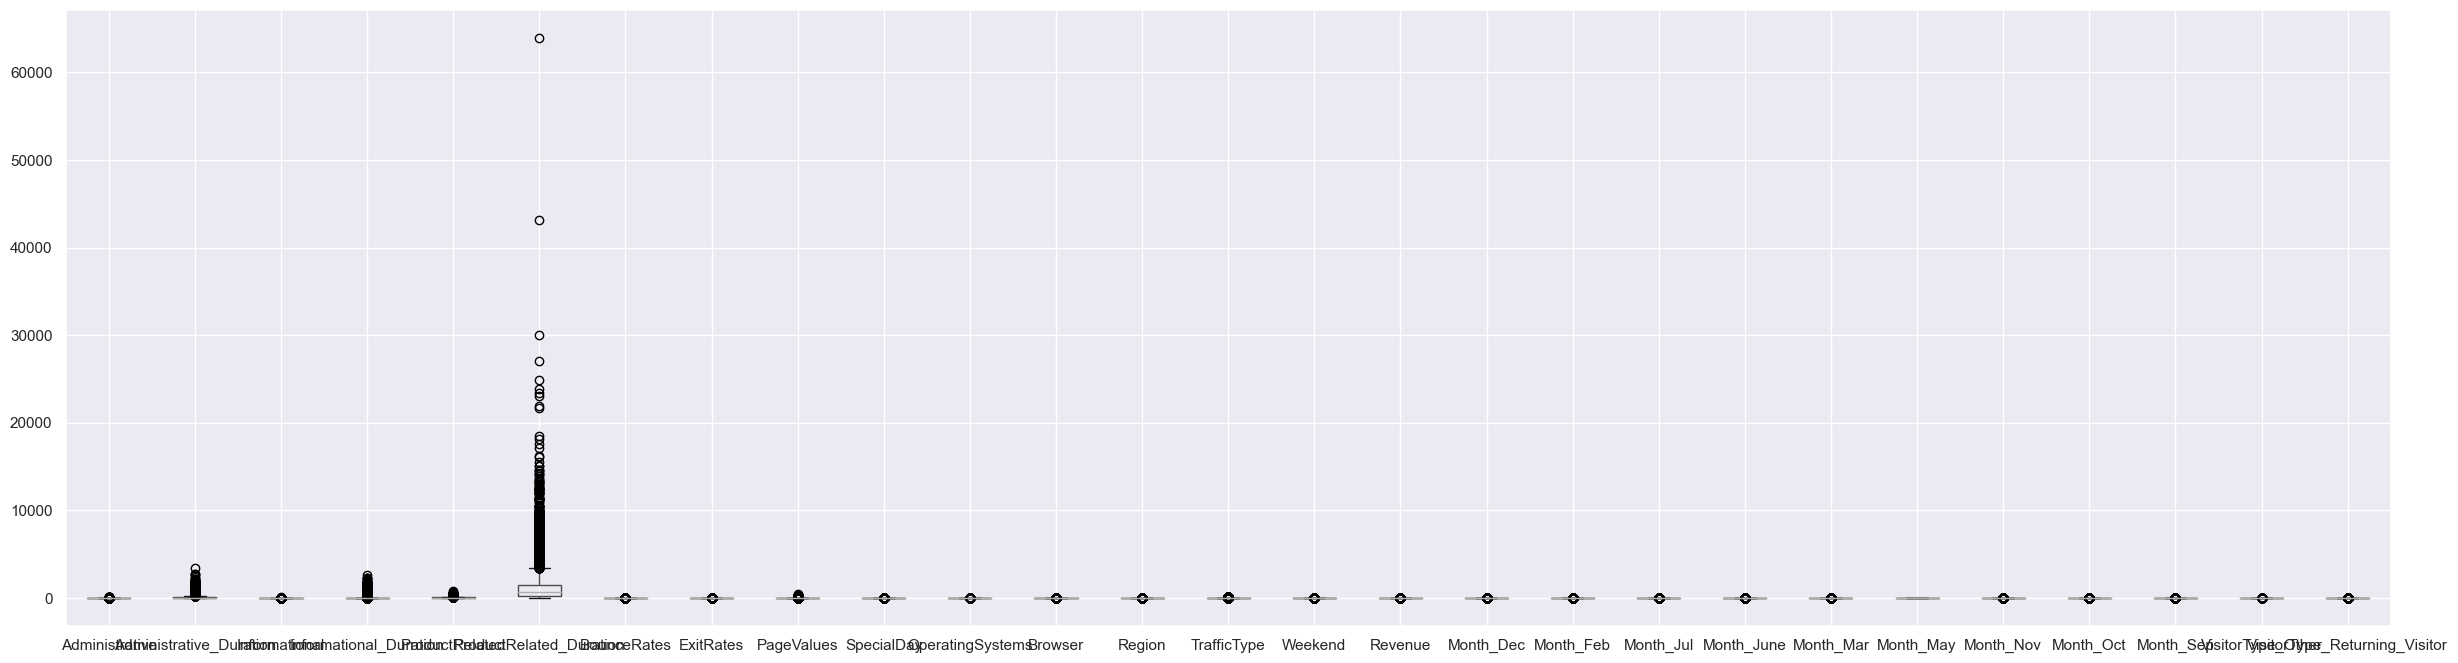

In [28]:
plt.figure(figsize = (30 , 8))
df.boxplot()
plt.show()

### Detecting Outliers

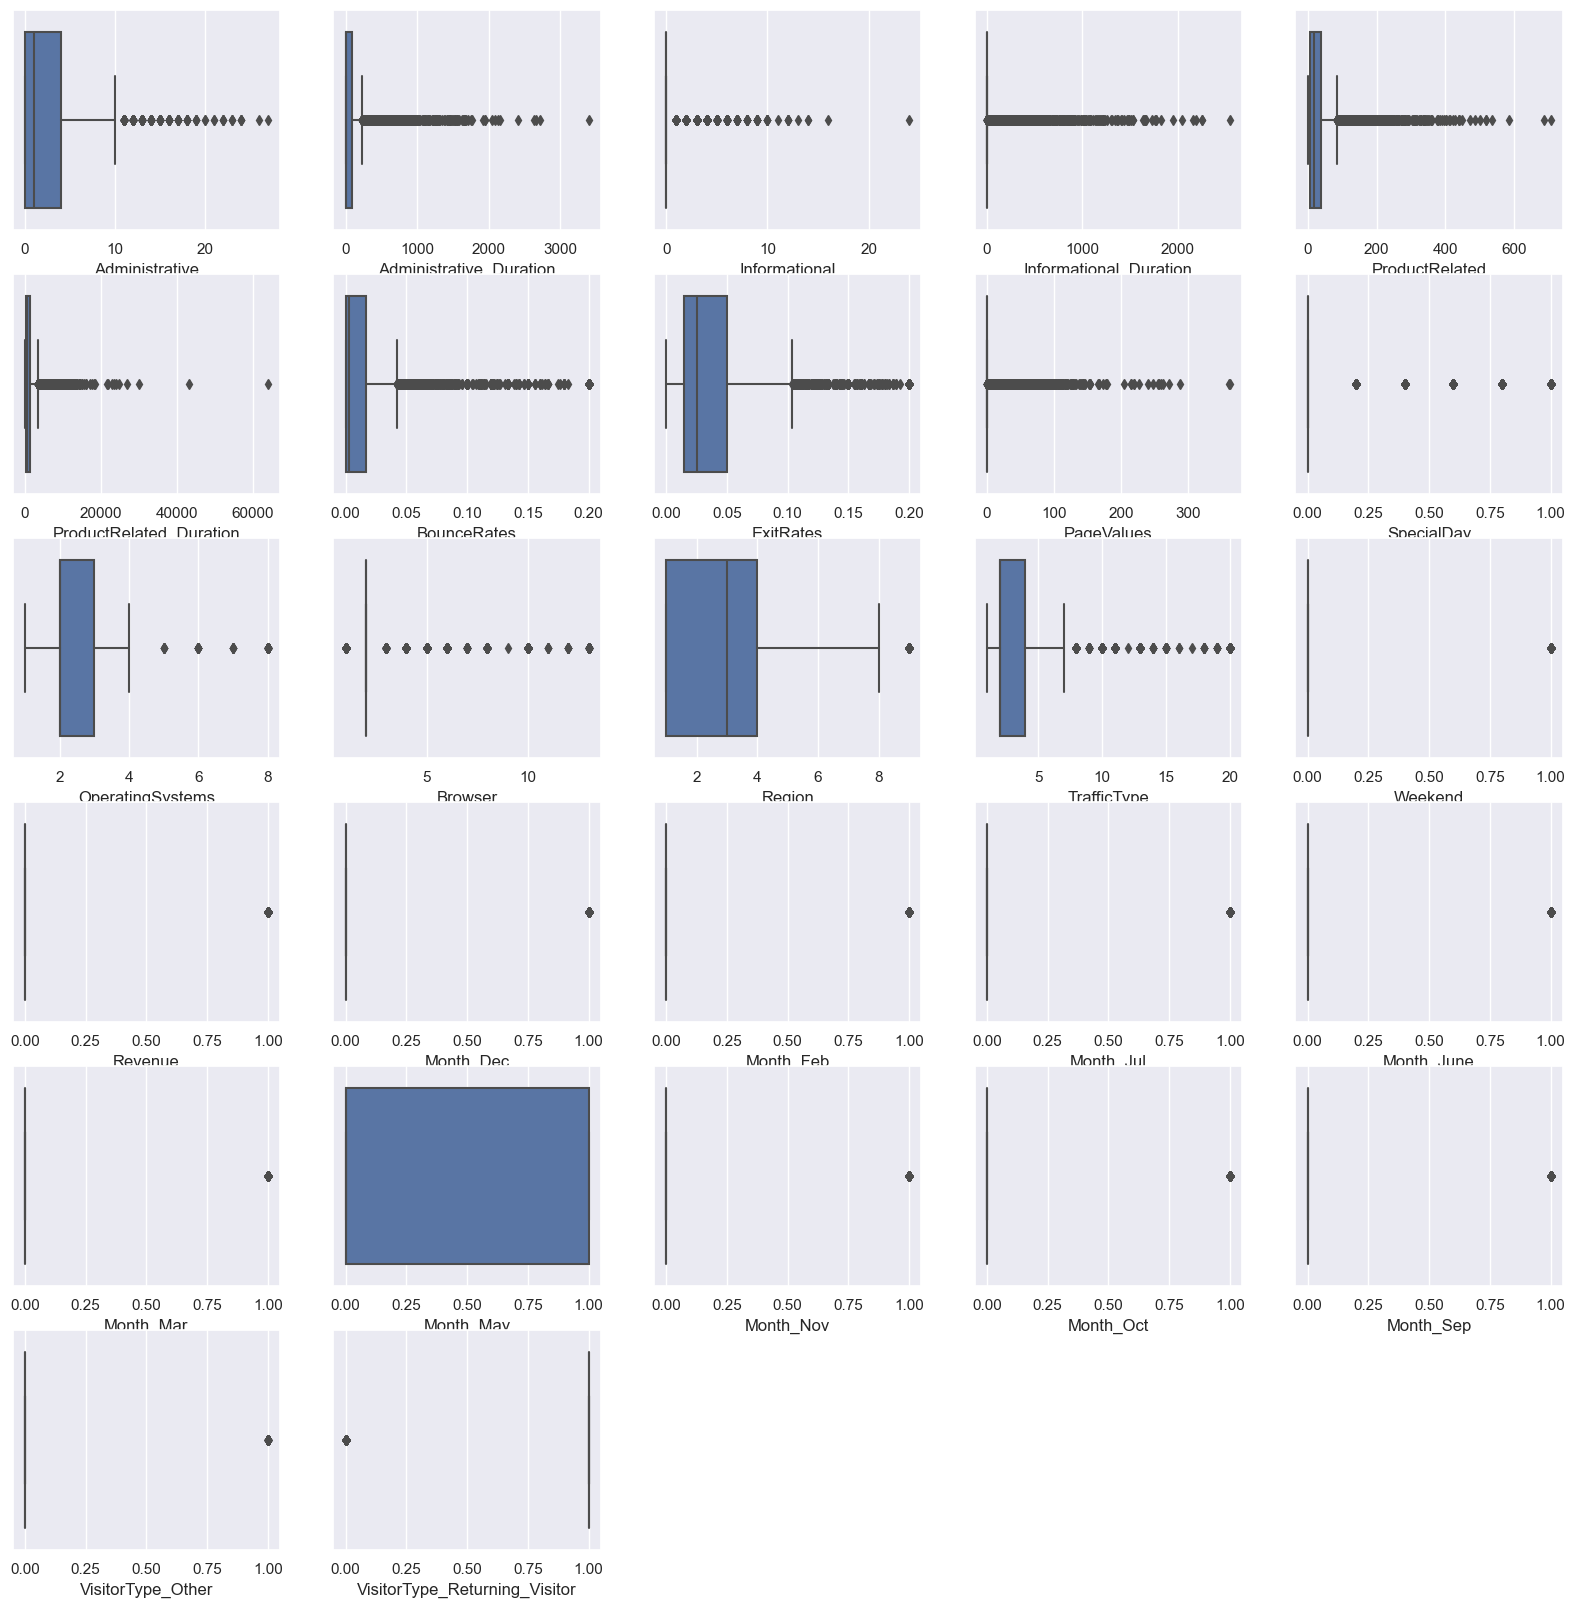

In [29]:
# def outliers_detection(col):
    
#     sns.boxplot(df[col])
#     plt.show()
    
    
# for i in list(df.columns)[:]:
#     outliers_detection(i)

plt.figure(figsize = (20 , 20))
def outliers_detection():
    
    i = 1
    
    for col in df.columns:
        
        plt.subplot(6 , 5 , i)
        
        sns.boxplot(data = df , x = col)
        
        i = i + 1
        

outliers_detection()

#### Capping the outliers

In [30]:
def capping_outliers(col):
    
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)
    
    df[col] = np.where(df[col] > upper_limit , upper_limit , 
            np.where(df[col] < lower_limit , lower_limit  , df[col]))

In [31]:
for i in list(x):
    
    capping_outliers(i)

#### After capping outliers

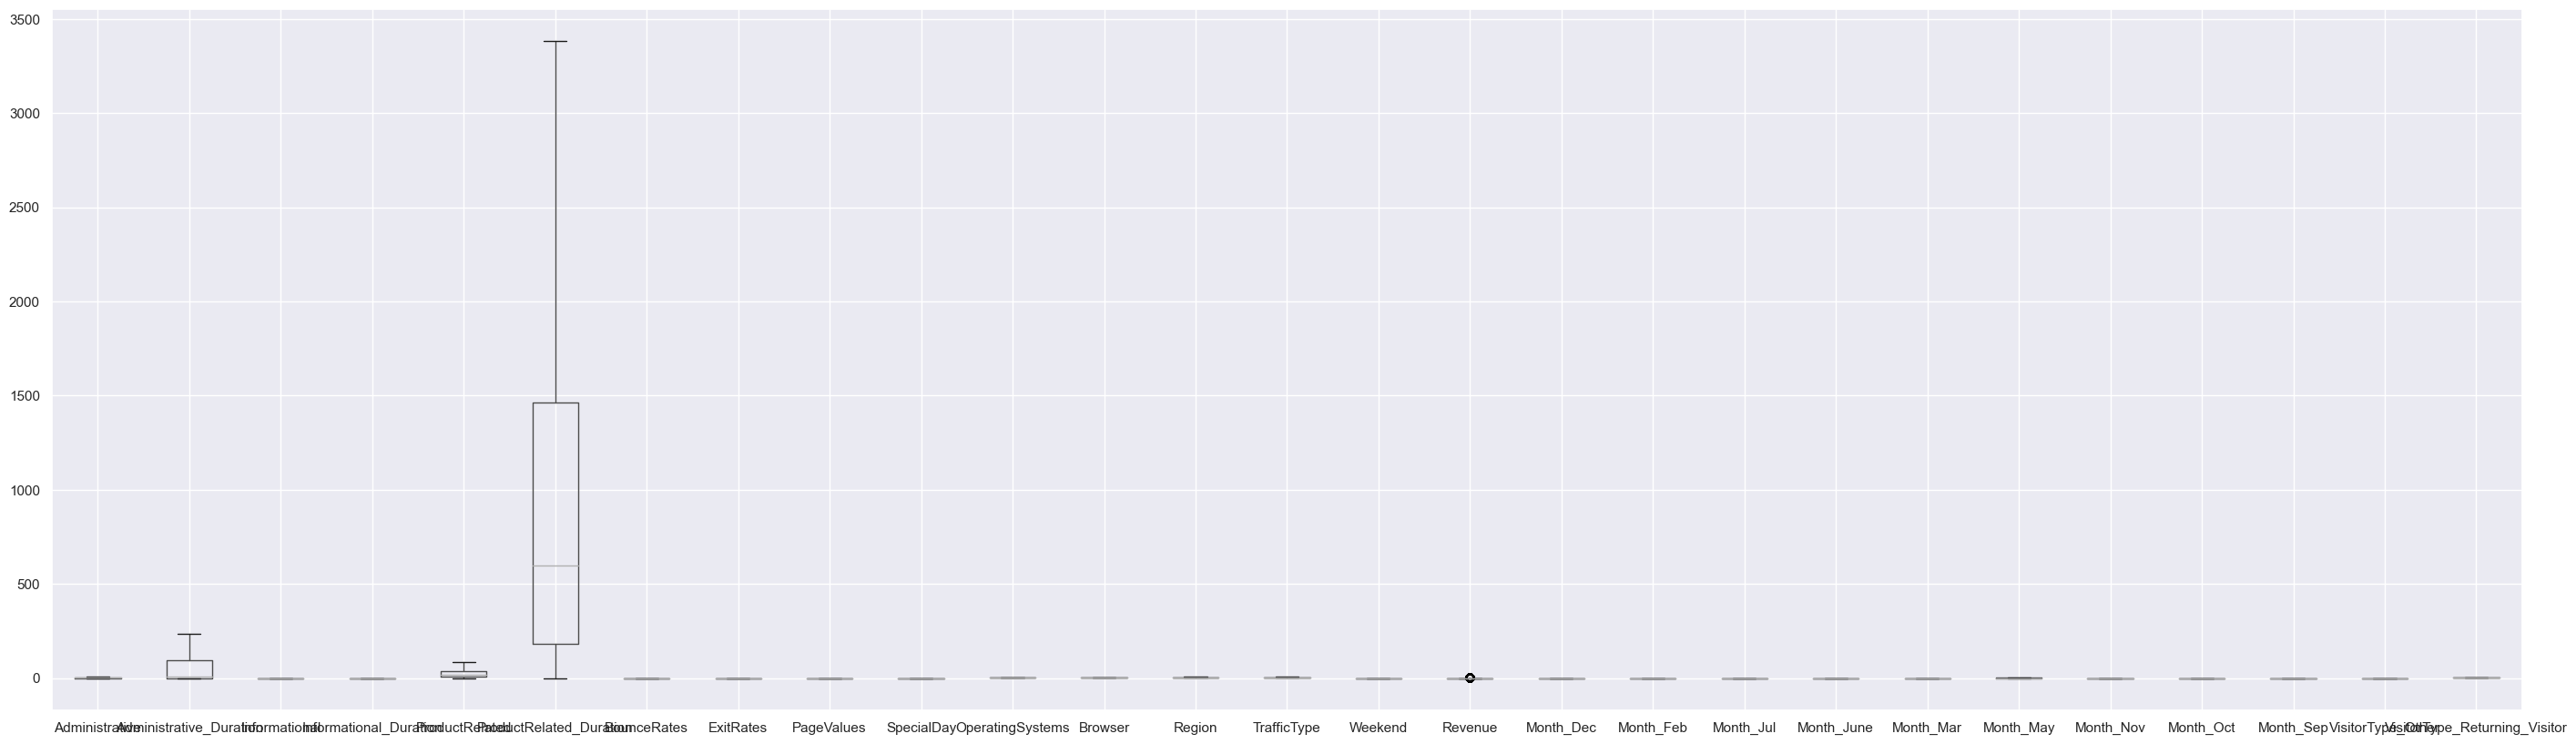

In [32]:
plt.figure(figsize = (35 , 10))
df.boxplot()
plt.show()

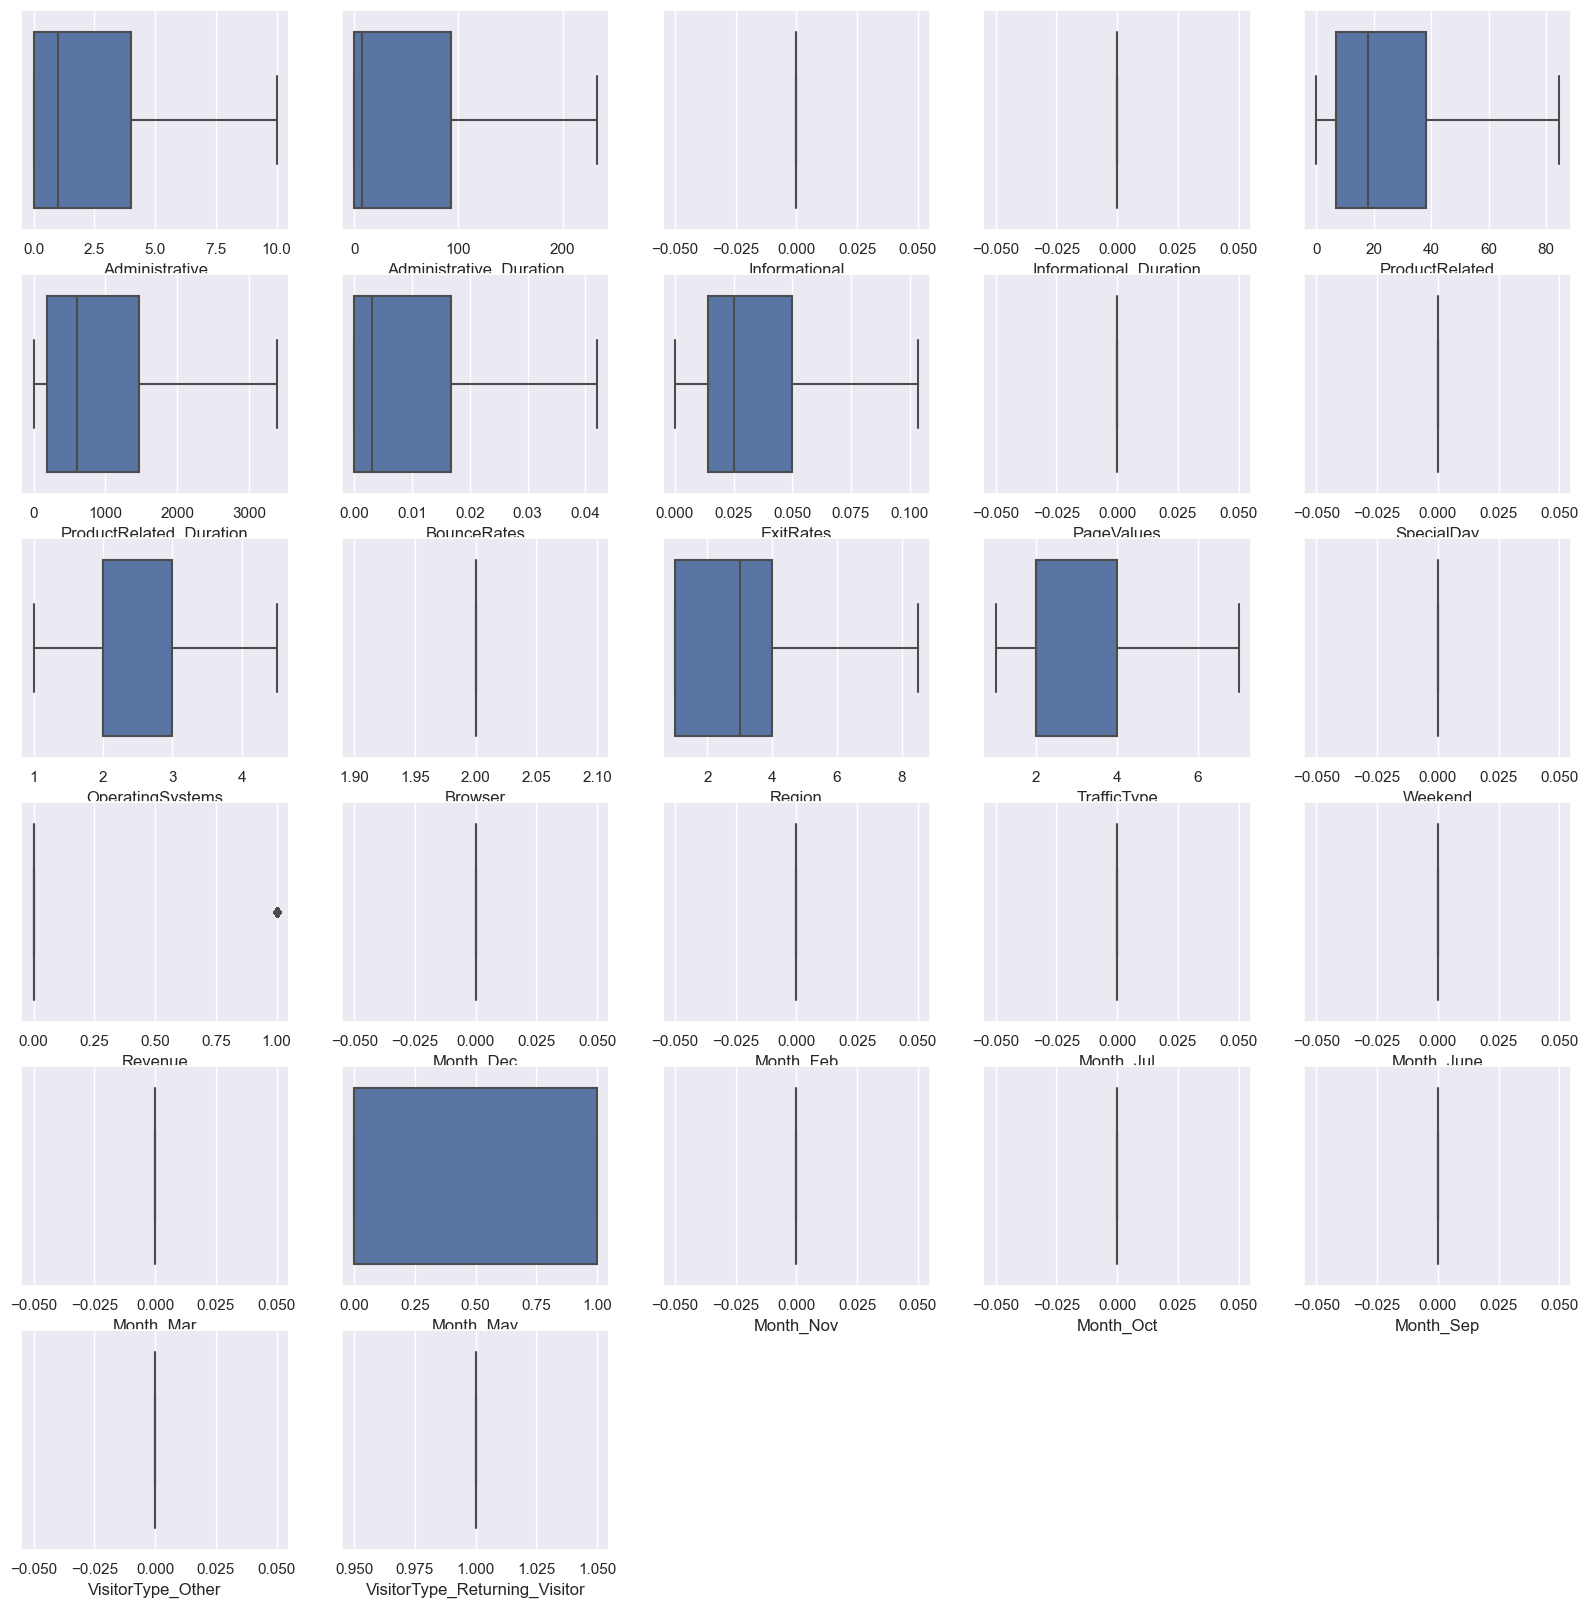

In [33]:
plt.figure(figsize = (20 , 20))
def outliers_detection():
    
    i = 1
    
    for col in df.columns:
        
        plt.subplot(6 , 5 , i)
        
        sns.boxplot(data = df , x = col)
        
        i = i + 1
        

outliers_detection()

### 4. Feature Scaling

In [34]:
scaler = StandardScaler()

In [35]:
x_scaled = scaler.fit_transform(x)

In [36]:
x_scaled = pd.DataFrame(x_scaled , columns = x.columns)

In [37]:
df = pd.concat([x_scaled , y] , axis = 1)

### 5.Data Balancing

In [38]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

#### Non Purchasing Rate Of Customers

In [39]:
len(df[df['Revenue'] == 0]) / len(df) * 100

84.52554744525548

#### Insights : 0 means non Purchasing  Customers 

#### Purchasing Rate Of Customers

In [40]:
len(df[df['Revenue'] == 1]) / len(df) * 100

15.474452554744525

#### Insights : 1 means purchasing Rate Of Customers

In [41]:
major_class = len(df[df['Revenue'] == 0])
minor_class = len(df[df['Revenue'] == 1])

In [42]:
print(major_class)
print(minor_class)

10422
1908


#### Checking data is balance or not ?

In [43]:
def Data_balance():
    
    if minor_class * 2 <= major_class:
        
        return 'Data Is Purely Imbalance'
        
    else:
        return 'Data Is Balance'

In [44]:
Data_balance()

'Data Is Purely Imbalance'

In [45]:
df['Revenue'].value_counts().index

Int64Index([0, 1], dtype='int64')

#### Pie Plot

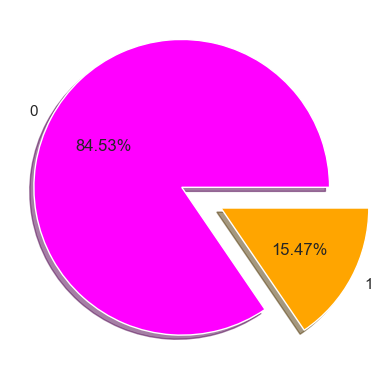

In [46]:
plt.pie(x = df['Revenue'].value_counts().values,
    explode=(0.1 , 0.2),
    labels=df['Revenue'].value_counts().index,
    colors=['magenta','orange'],
    autopct='%1.02f%%',
    shadow= True)
plt.show()

#### Make Data Balance

In [47]:
smote = SMOTE()

In [48]:
smote

SMOTE()

In [49]:
x_smote , y_smote = smote.fit_resample(x_scaled , y)

In [50]:
def is_data_balance():
    
    print('Before the resample x is :' , x_scaled.shape)
    print('Before the resample y is :' , y.shape)
    print('************'*30)
    print('After the resample is :' , x_smote.shape)
    print('After the resample is :' , y_smote.shape)

In [51]:
is_data_balance()

Before the resample x is : (12330, 26)
Before the resample y is : (12330,)
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
After the resample is : (20844, 26)
After the resample is : (20844,)


In [52]:
df = pd.concat([x_smote , y_smote] , axis = 1)

In [53]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0


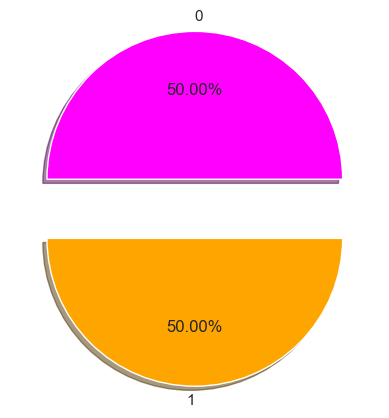

In [54]:
plt.pie(x = df['Revenue'].value_counts().values,
    explode=(0.2, 0.2),
    labels=df['Revenue'].value_counts().index,
    colors=['magenta' , 'orange'],
    autopct='%1.02f%%',
    shadow=True)
plt.show()

#### Now Data Is Clearly Balanced.

#### Check Distribution of dataset

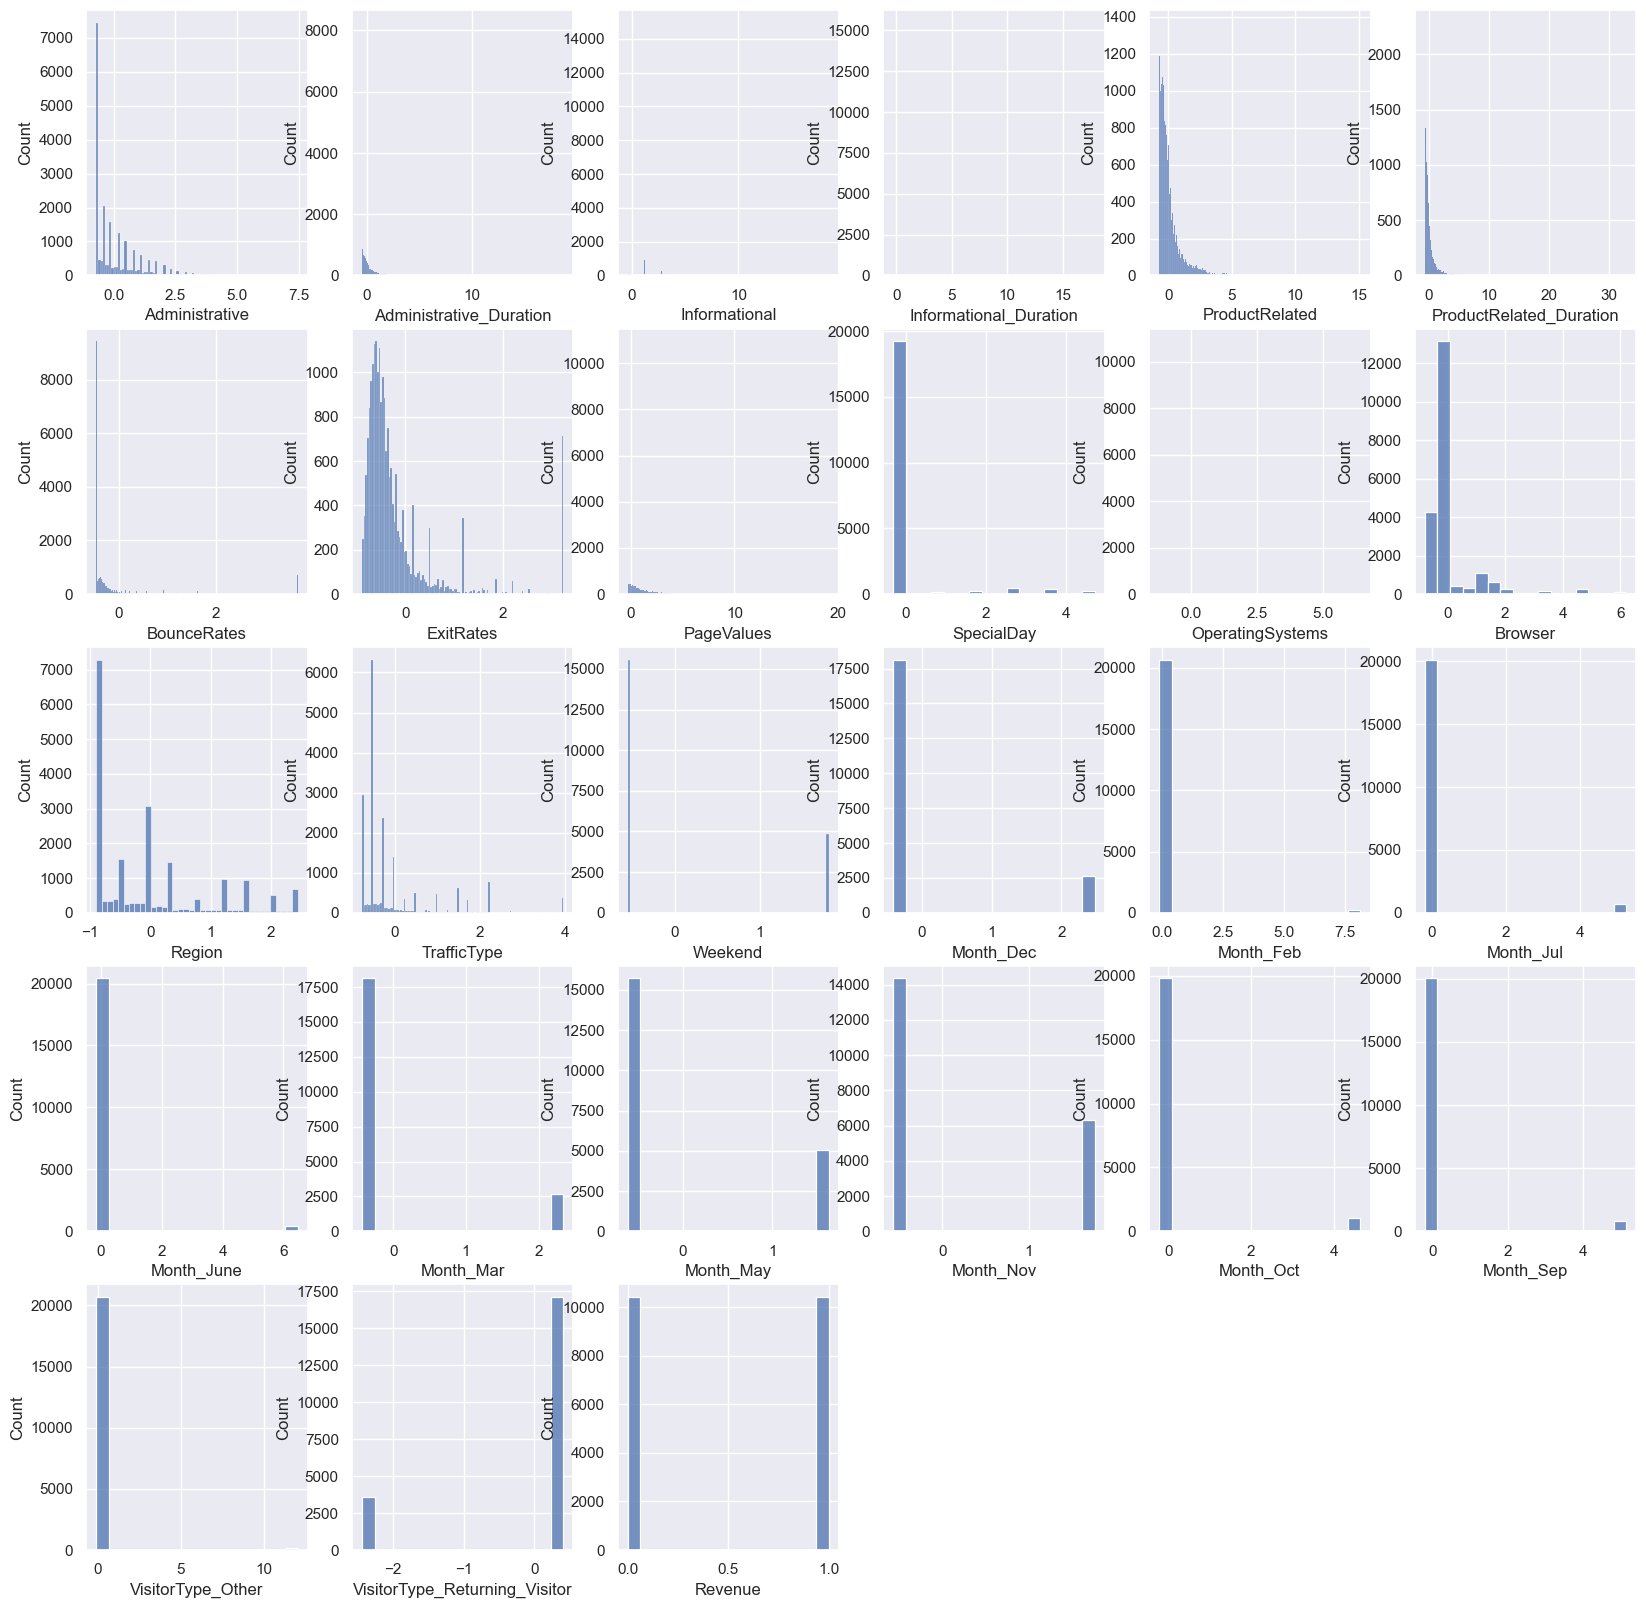

In [55]:
plt.figure(figsize = (20 , 20))

def check_distribution():
    
    i = 1
    
    for col in df.columns:
        
        plt.subplot(5,6 ,i)
        
        sns.histplot(df[col])
        
        i = i + 1
        
check_distribution()

#### Insights : By the understanding of the data , no any single feature is not in normal distribution  means data is not belongs to normal distribution

#### By visualization of histogram  , we get understand , data is skewed and most of data is rightly skewed or positive skewed.

#### Skewness

In [56]:
df.skew()

Administrative                    1.711848
Administrative_Duration           5.059450
Informational                     3.530926
Informational_Duration            6.609290
ProductRelated                    3.797793
ProductRelated_Duration           5.291798
BounceRates                       3.955057
ExitRates                         2.886671
PageValues                        4.143608
SpecialDay                        3.958689
OperatingSystems                  2.545899
Browser                           3.440345
Region                            1.057548
TrafficType                       2.165176
Weekend                           1.201534
Month_Dec                         2.215514
Month_Feb                        10.392505
Month_Jul                         5.125908
Month_June                        6.704105
Month_Mar                         2.202250
Month_May                         1.191539
Month_Nov                         0.835228
Month_Oct                         4.107278
Month_Sep  

#### visualize skewed data

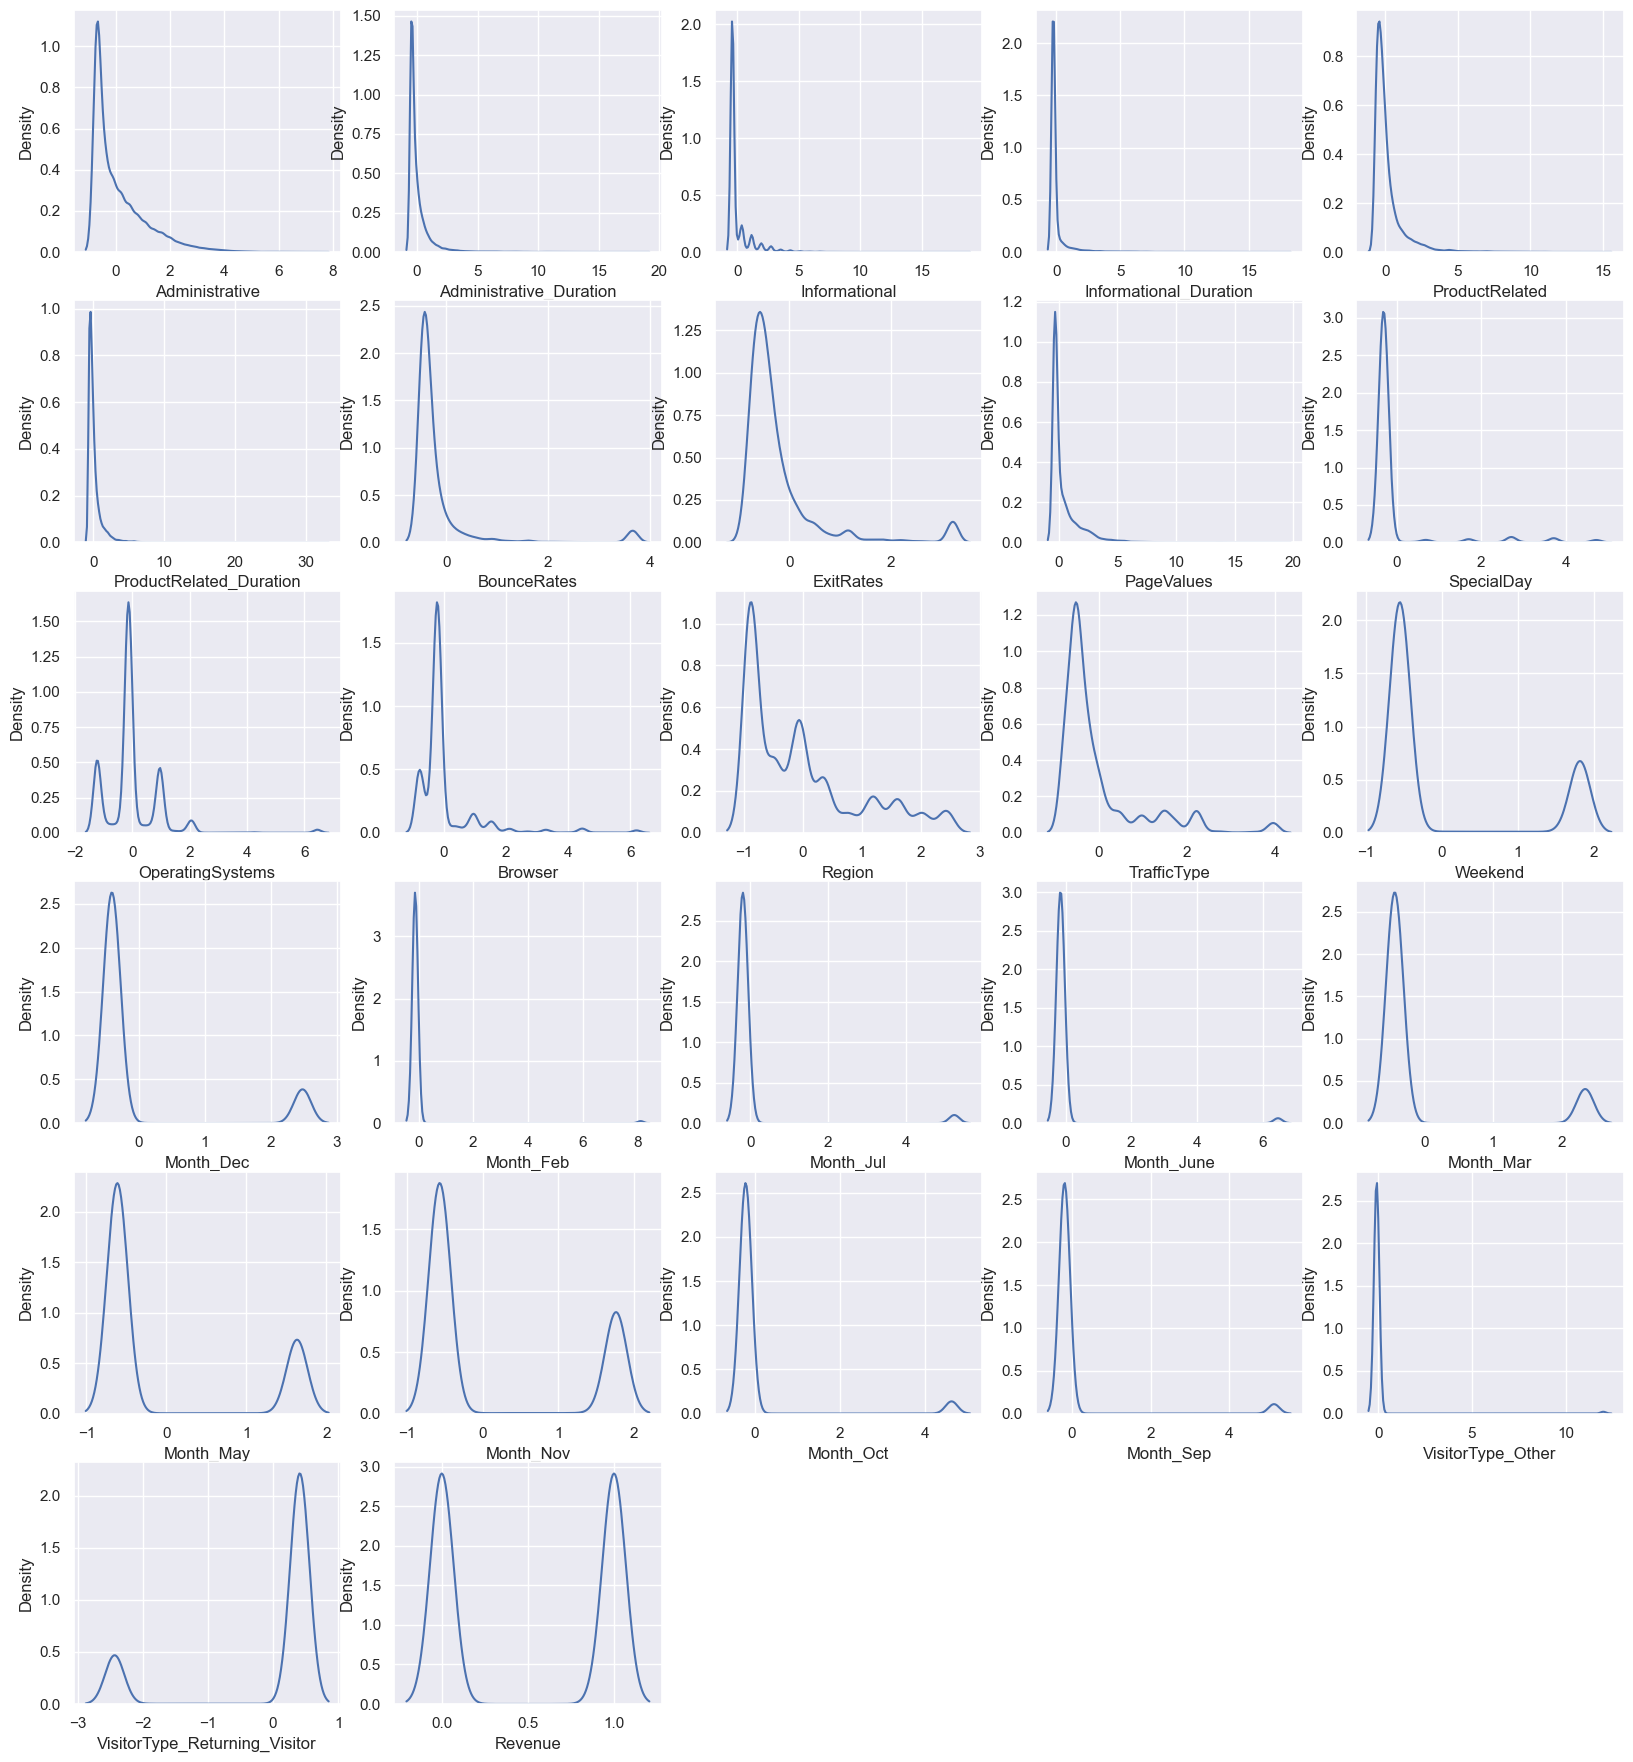

In [57]:
plt.figure(figsize = (20 , 22))
def skewed_visualization():
    
    i = 1
    
    for col in df.columns:
        
        plt.subplot(6 , 5 , i)
        
        sns.kdeplot(df[col])
        
        i = i + 1
        
skewed_visualization()

#### Insights : From visualization , we get understand data is rightly skewed or positive skewed

#### Bivariate Analysis

In [58]:
# sns.pairplot(data = df ,hue = 'Revenue' , diag_kind='kde')
# plt.show()

#### Scatterplot

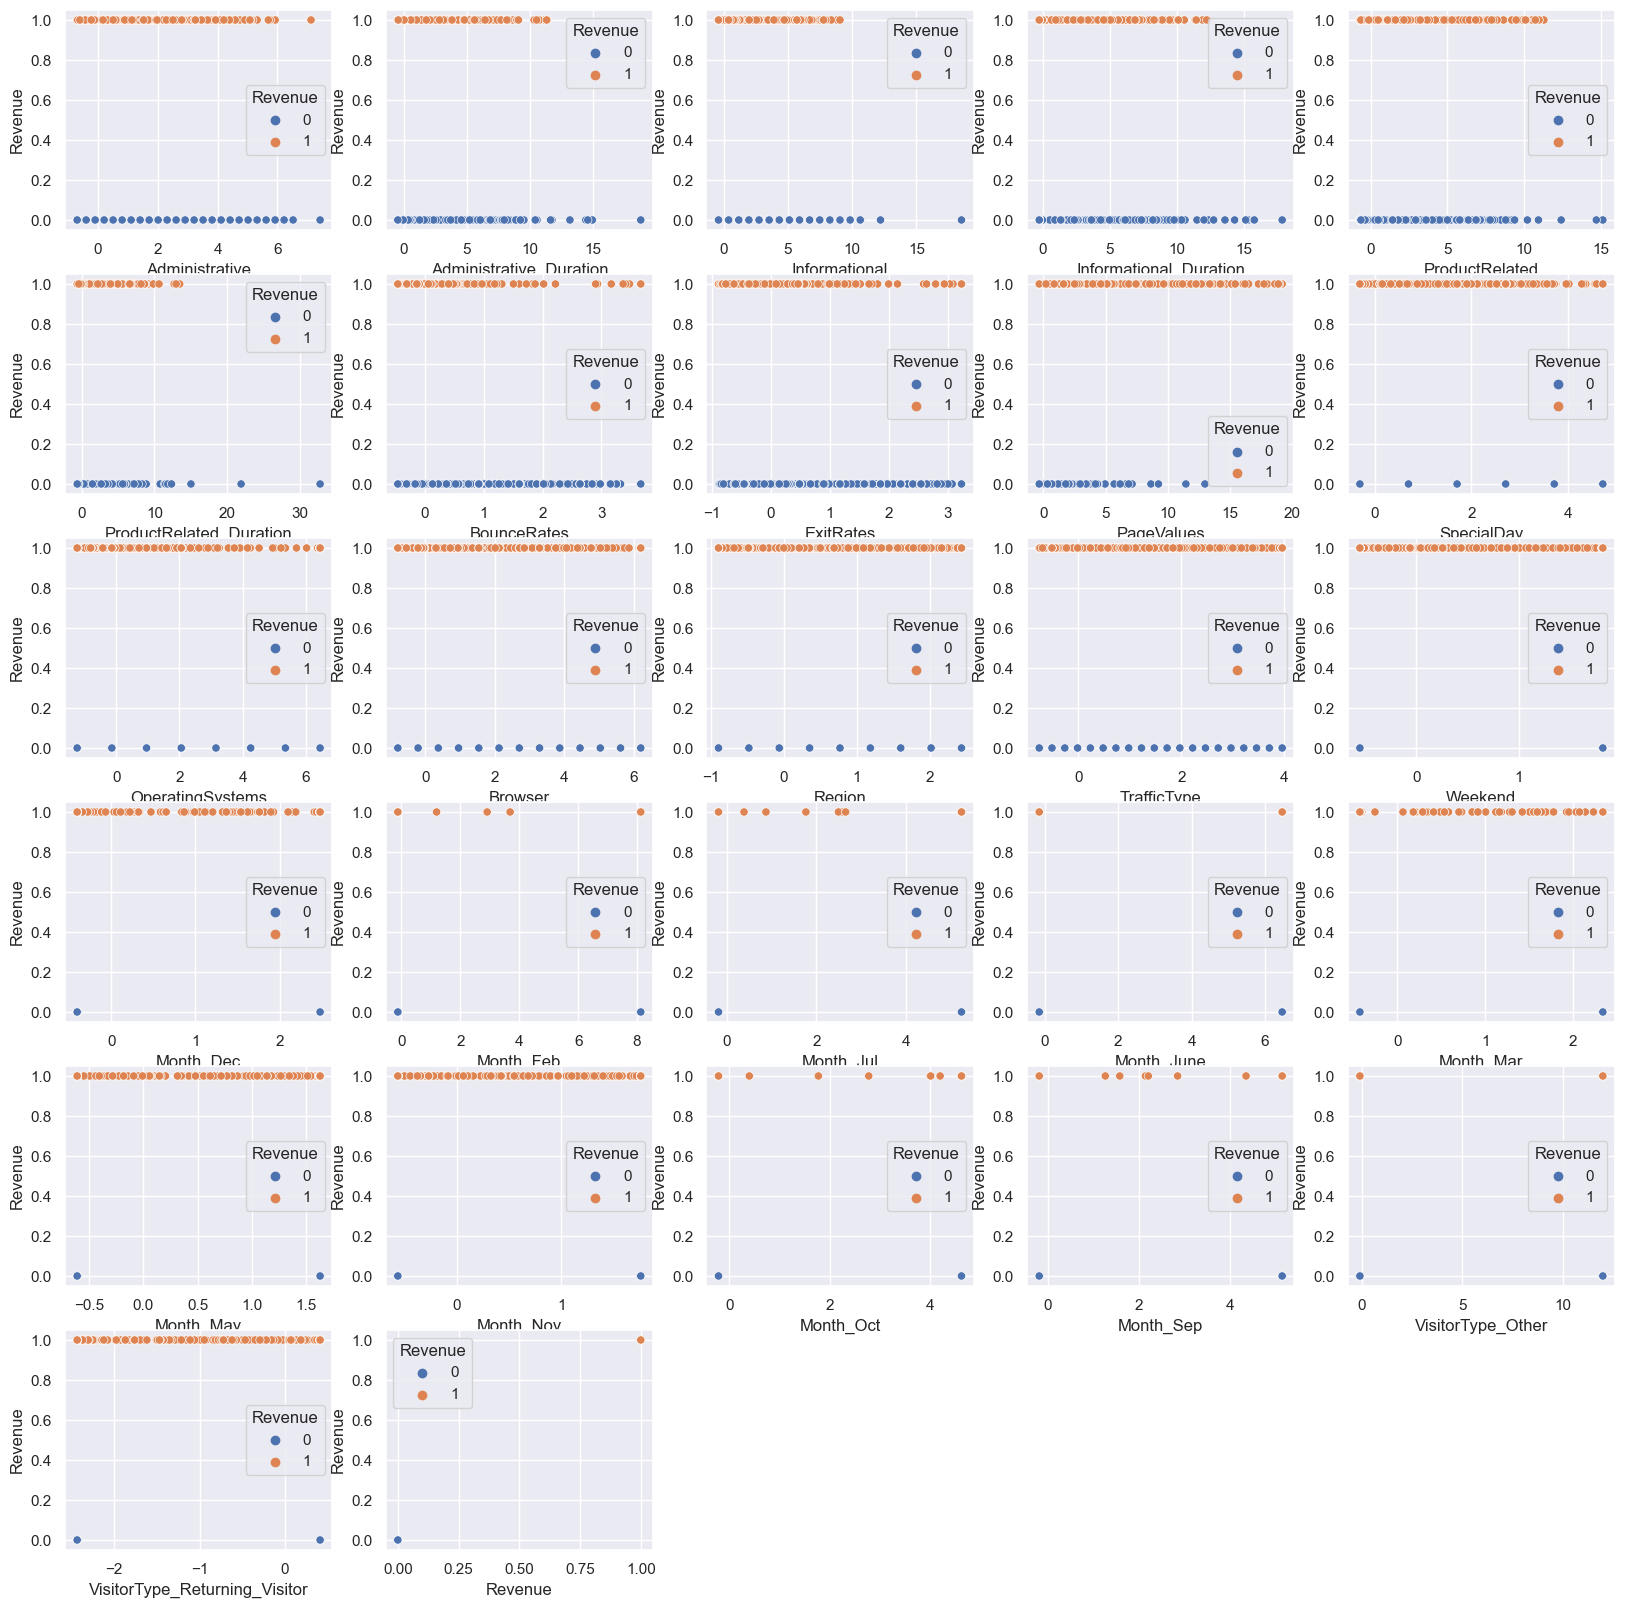

In [59]:
plt.figure(figsize = (20 , 20))
def scatter_visualization():
    
    i = 1
    
    for col in df.columns:
        
        plt.subplot(6 , 5 , i)
        
        sns.scatterplot(data = df , x = df[col] , y = df['Revenue'] , hue = df['Revenue'])
        
        i = i + 1
        
scatter_visualization()

#### Scatter Plot positive Correlation  

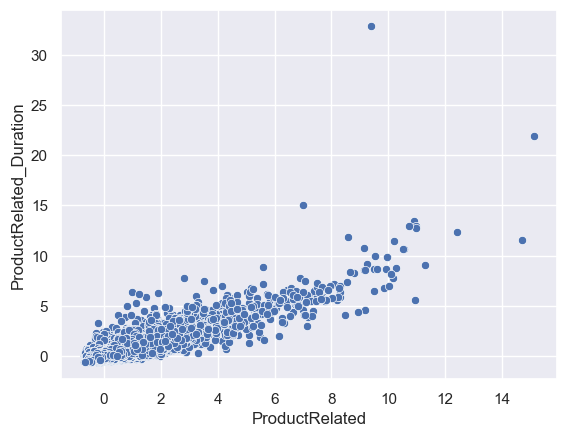

In [60]:
#plt.figure(figsize = (20, 10))
sns.scatterplot(data = df , x = df['ProductRelated'] , y = df['ProductRelated_Duration'])
plt.show()

##### Insights : Positive linear relation between ProductRelated and ProductRelated_Duration

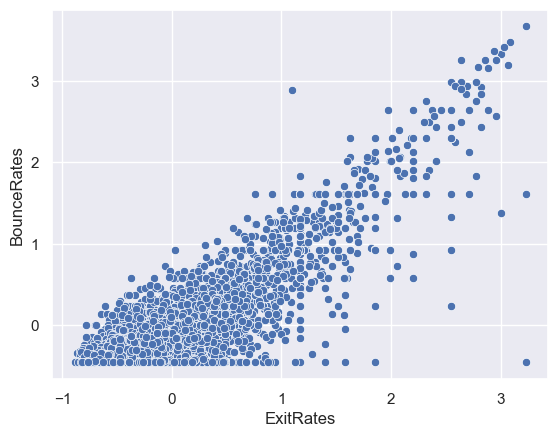

In [61]:
sns.scatterplot(data = df ,  x = df['ExitRates'] , y = df['BounceRates'])
plt.show()

#### Insights : Positive linear relation between ExitRates and BounceRates

#### Split the data into train and test

In [62]:
x_train , x_test , y_train , y_test = train_test_split(x_smote , y_smote , test_size = 0.25 , random_state = 123)

In [63]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(15633, 26) (5211, 26) (15633,) (5211,)


#### Data Preprocessing and EDA are completed and now we proceed for model building

### Model Building

#### First of all we will check average accuracy

In [64]:
estimator = [('LogisticRegression' , LogisticRegression()) , ('DecisionTreeClassifier' , DecisionTreeClassifier()) , ('RandomForestClassifier', RandomForestClassifier()) ,('BaggingClassifier' , BaggingClassifier()) , ('AdaBoostClassifier' , AdaBoostClassifier()) , ('GradientBoostingClassifier' , GradientBoostingClassifier()) , ('SVM' , svm.SVC()) , ('Naive Bayes' , BernoulliNB())]

In [65]:
estimator

[('LogisticRegression', LogisticRegression()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('RandomForestClassifier', RandomForestClassifier()),
 ('BaggingClassifier', BaggingClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('SVM', SVC()),
 ('Naive Bayes', BernoulliNB())]

In [66]:
for model in estimator:
    
    accuracy = cross_val_score(model[1] , x_train , y_train , scoring = 'accuracy')
    
    print(model[0] , ':' , np.mean(accuracy))

LogisticRegression : 0.8321495995601842
DecisionTreeClassifier : 0.8924064056457484
RandomForestClassifier : 0.9334739368851281
BaggingClassifier : 0.9243901126567543
AdaBoostClassifier : 0.9074389959204101
GradientBoostingClassifier : 0.9264375188874642
SVM : 0.8709142565904335
Naive Bayes : 0.8130876699564868


## StackingClassifier

In [67]:
final_estimator = RandomForestClassifier()

In [68]:
stack = StackingClassifier(estimators = estimator , final_estimator = final_estimator , cv = 10)

In [69]:
stack

StackingClassifier(cv=10,
                   estimators=[('LogisticRegression', LogisticRegression()),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('BaggingClassifier', BaggingClassifier()),
                               ('AdaBoostClassifier', AdaBoostClassifier()),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier()),
                               ('SVM', SVC()), ('Naive Bayes', BernoulliNB())],
                   final_estimator=RandomForestClassifier())

#### Train the stacking model

In [70]:
stack.fit(x_train , y_train)

StackingClassifier(cv=10,
                   estimators=[('LogisticRegression', LogisticRegression()),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('BaggingClassifier', BaggingClassifier()),
                               ('AdaBoostClassifier', AdaBoostClassifier()),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier()),
                               ('SVM', SVC()), ('Naive Bayes', BernoulliNB())],
                   final_estimator=RandomForestClassifier())

#### Prediction of Training model

In [71]:
y_train_pred_stack = stack.predict(x_train)

In [72]:
print(y_train_pred_stack)

[1 0 1 ... 1 1 1]


### Performance Matrices Of StackingClassifier Training Model

#### Training Accuracy of Stacking

In [73]:
training_accuracy_stack = accuracy_score(y_train , y_train_pred_stack)

In [74]:
training_accuracy_stack

0.9908526834260858

#### Confusion Matrix of training model of stacking

In [75]:
confusion_matrix(y_train  , y_train_pred_stack)

array([[7718,  143],
       [   0, 7772]], dtype=int64)

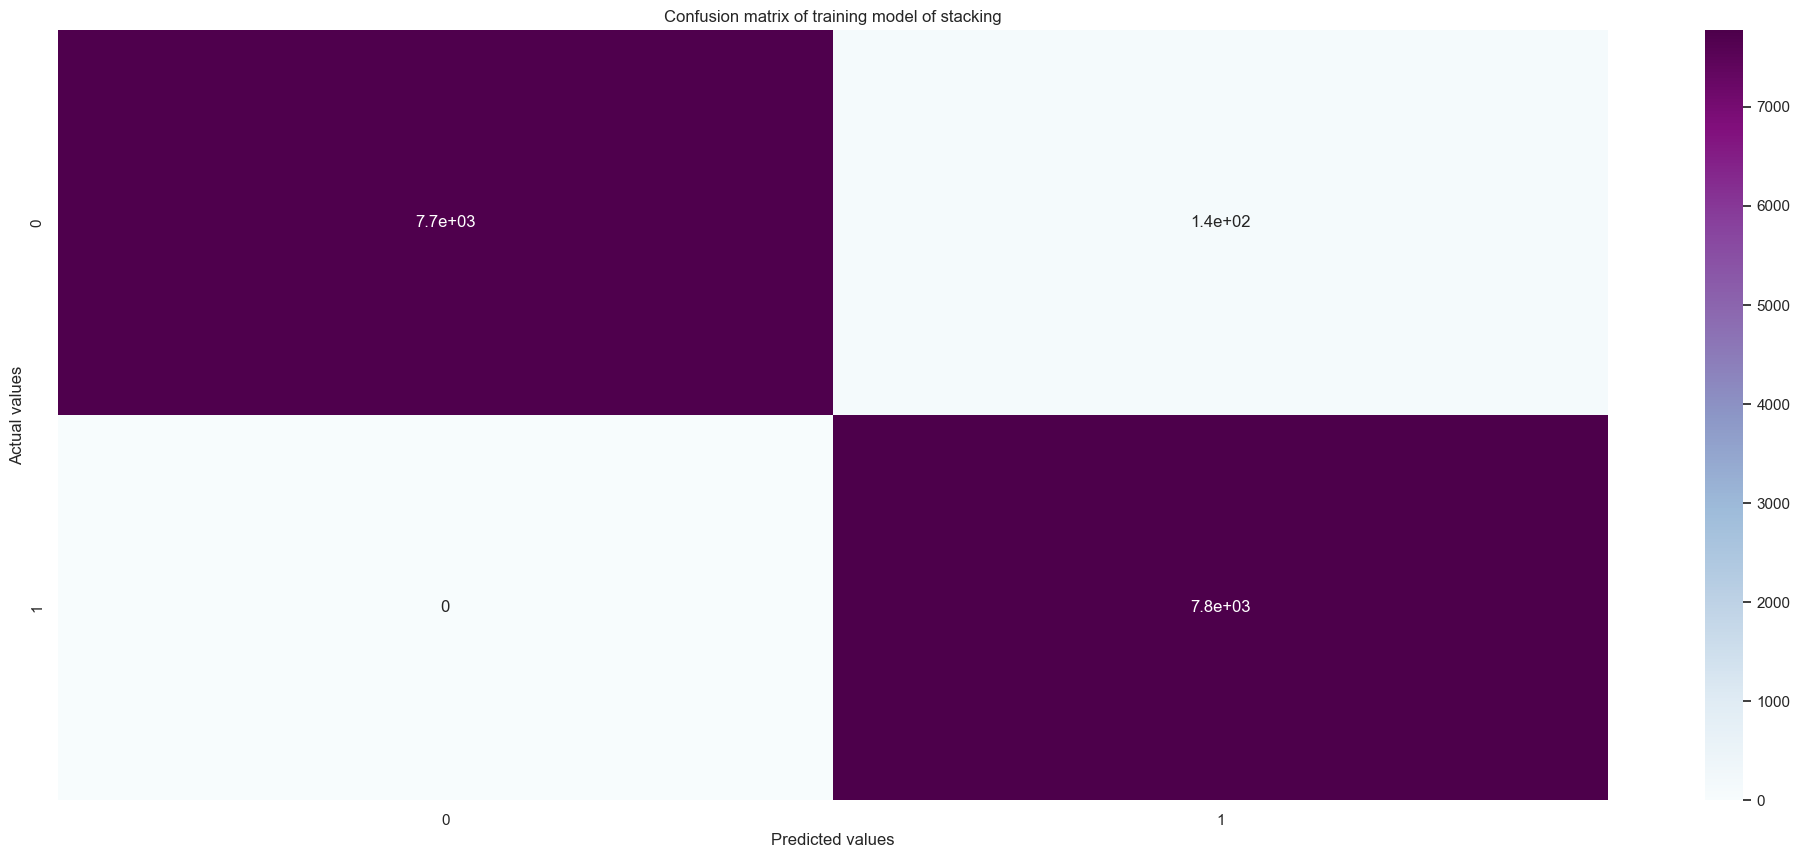

In [76]:
plt.figure(figsize = (25 , 10))
sns.heatmap(confusion_matrix(y_train  , y_train_pred_stack) , 
            annot = True , cbar = True , cmap = 'BuPu',
            xticklabels = y.value_counts().index ,
           yticklabels = y.value_counts().index)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix of training model of stacking')
plt.show()

#### Insights :

##### TP : 7772
##### TN : 7713
##### FN :  0 (Type II Error)
##### FP : 148  (Type I Error)

#### Classification Report On Stacking Classifier Training Model

In [77]:
print(classification_report(y_train , y_train_pred_stack))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7861
           1       0.98      1.00      0.99      7772

    accuracy                           0.99     15633
   macro avg       0.99      0.99      0.99     15633
weighted avg       0.99      0.99      0.99     15633



#### Insights : We get 0.98 % macro avg

#### ROC AUC Curve On Training Model

In [78]:
roc_auc_score_train_stack = roc_auc_score(y_train , y_train_pred_stack)

In [79]:
roc_auc_score_train_stack

0.9909044650807785

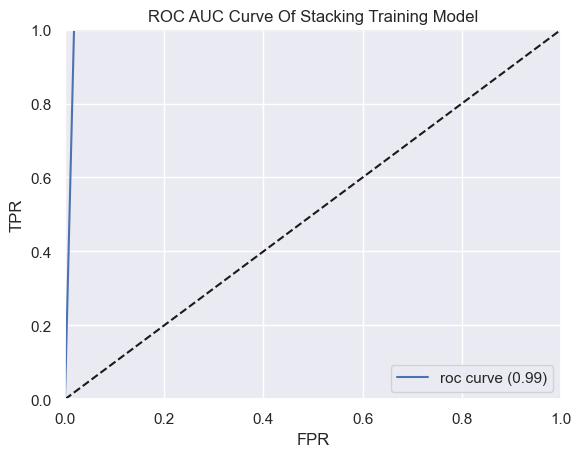

In [80]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred_stack)
plt.plot(fpr , tpr , label = 'roc curve (%1.2f)' % roc_auc_score_train_stack)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve Of Stacking Training Model')
plt.legend(loc = 'lower right')
plt.show()

### Testing Model Of StackingClassifier

#### Prediction On Testing Data

In [81]:
y_test_pred_stack = stack.predict(x_test)

In [82]:
y_test_pred_stack

array([1, 0, 0, ..., 0, 0, 1])

#### Testing Accuracy Of StackingClassifier

In [83]:
testing_accuracy_stack = accuracy_score(y_test , y_test_pred_stack)

In [84]:
testing_accuracy_stack

0.9420456726156208

#### Confusion Matrix of Testing model of StackingClassifier

In [85]:
confusion_matrix(y_test , y_test_pred_stack)

array([[2405,  156],
       [ 146, 2504]], dtype=int64)

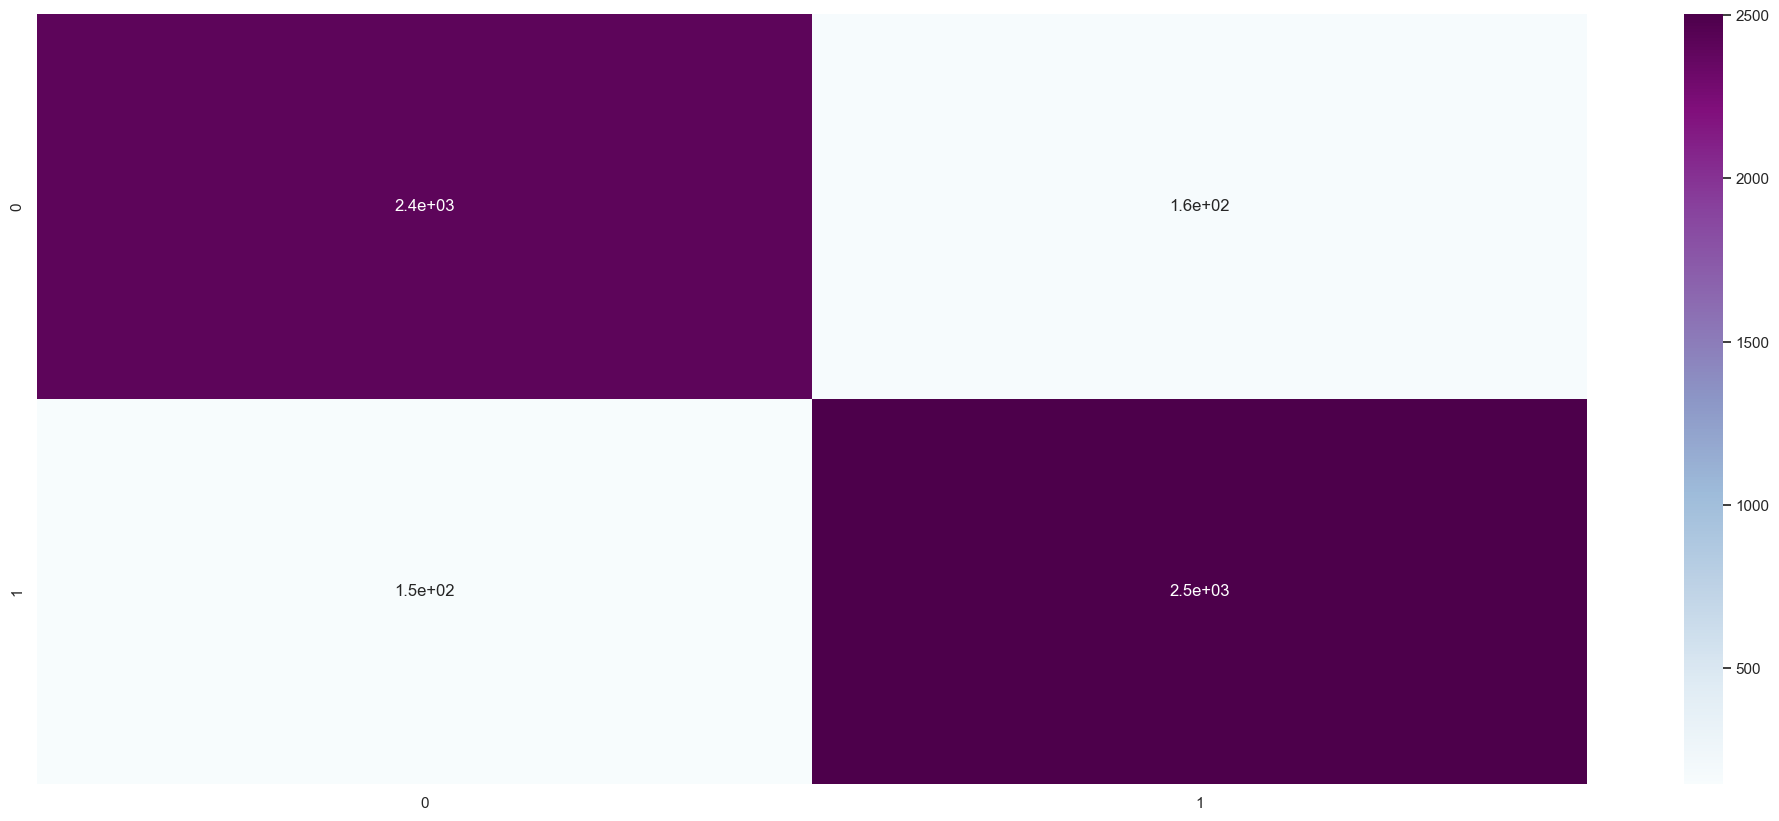

In [86]:
plt.figure(figsize = (25 , 10))
sns.heatmap(confusion_matrix(y_test , y_test_pred_stack) , cbar = True , cmap = 'BuPu',
           annot = True , 
           xticklabels = y.value_counts().index , 
           yticklabels = y.value_counts().index)
plt.show()

#### Insights : 

#### TP : 2504
#### TN : 2402
#### FN : 146
#### FP : 159

#### Classification Report

In [87]:
print(classification_report(y_test , y_test_pred_stack))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2561
           1       0.94      0.94      0.94      2650

    accuracy                           0.94      5211
   macro avg       0.94      0.94      0.94      5211
weighted avg       0.94      0.94      0.94      5211



#### Insights : We get 0.94 macro avg

#### ROC AUC curve of Testing model

In [88]:
roc_auc_score_test_stack = roc_auc_score(y_test , y_test_pred_stack)

In [89]:
roc_auc_score_test_stack

0.9419959773968011

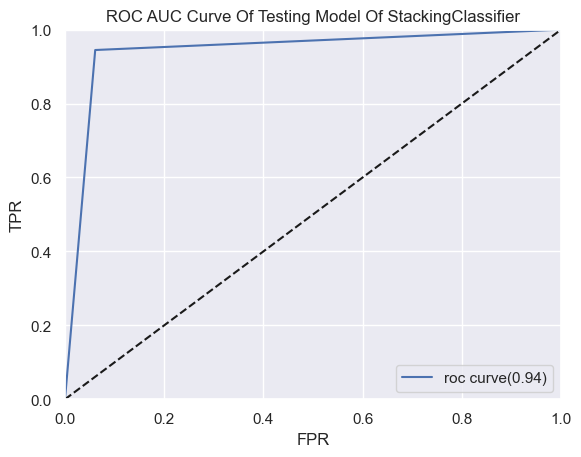

In [90]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_stack)
plt.plot(fpr , tpr , label= 'roc curve(%1.2f)' % roc_auc_score_test_stack)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0] ,)
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve Of Testing Model Of StackingClassifier')
plt.legend(loc = 'lower right')
plt.show()

#### Insights of both models are : 

In [91]:
print('ROC AUC Score Of StackingClassifier Training Model Is :' , roc_auc_score_train_stack)
print('ROC AUC Score Of StackingClassifier Testing Model Is :' , roc_auc_score_test_stack)

ROC AUC Score Of StackingClassifier Training Model Is : 0.9909044650807785
ROC AUC Score Of StackingClassifier Testing Model Is : 0.9419959773968011


In [92]:
print('Training Accuracy of StackingClassifier :' , training_accuracy_stack)
print('Testing  Accuracy of StackingClassifier :' , testing_accuracy_stack)

Training Accuracy of StackingClassifier : 0.9908526834260858
Testing  Accuracy of StackingClassifier : 0.9420456726156208


#### Conslusion : StackingClassifier model gives better results and It does not have any kind of overfitting or underfitting issues . so StackingClassifier model is best

#### Pickle the model

In [93]:
pickle.dump(stack , file = open('model.pkl' , 'wb'))

#### Unpickle the model

In [94]:
model = pickle.load(file = open('model.pkl' , 'rb'))

In [95]:
model

StackingClassifier(cv=10,
                   estimators=[('LogisticRegression', LogisticRegression()),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('BaggingClassifier', BaggingClassifier()),
                               ('AdaBoostClassifier', AdaBoostClassifier()),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier()),
                               ('SVM', SVC()), ('Naive Bayes', BernoulliNB())],
                   final_estimator=RandomForestClassifier())